In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pywt

In [30]:
img = cv2.imread('cameraman.png', 0)

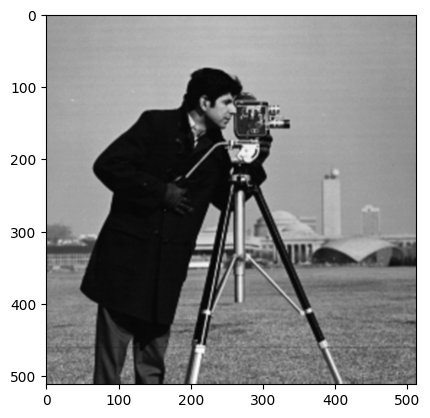

In [31]:
#show the image
plt.imshow(img, cmap='gray', interpolation='bicubic')

In [32]:
#show the matrix image and its size
print(img.shape)
print(img)
print(img.max())
print(img.min())

(512, 512)
[[157 157 159 ... 151 151 151]
 [155 157 157 ... 151 151 151]
 [157 157 155 ... 153 151 151]
 ...
 [122 120 126 ... 122 114 110]
 [120 120 129 ... 124 114 108]
 [124 120 126 ... 120 112 112]]
255
0


In [33]:
# calculate moments
from sympy import symbols, Eq, solve

def findMoments (img):

    #_, bin_img = cv2.threshold(img, 100, 252, cv2.THRESH_BINARY)  #this step can be optional as well. i dont know if this is even neccessary
    moment = cv2.moments(img)

    #create a dictionary to store the information
    variables_dict = {}
    t_alpha = int(moment['m10']/moment['m00'])
    t_beta = int(moment['m01']/moment['m00'])
    mu_03 = moment['mu03']
    mu_12 = moment['mu12']
    mu_21 = moment['mu21']
    mu_30 = moment['mu30']
    mu_11 = moment['mu11']
    mu_20 = moment['mu20']

    b = symbols('b')
    equation = Eq((b**3)*mu_03 + 3*(b**2)*mu_12 + 3*b*mu_21 + mu_30, 0)
    betas = solve(equation, b)

    betas_real = []
    for i in range(len(betas)):
        if np.isreal(betas[i]):
            betas_real.append(betas[i])


    #take the median of betas_real
    beta = betas_real[0]

    lambda_ = mu_11/mu_20

    variables_dict['t_alpha'] = t_alpha
    variables_dict['t_beta'] = t_beta
    variables_dict['beta'] = beta
    variables_dict['lambda'] = lambda_

    return variables_dict


In [34]:
def translate (img, variables_dict):

    t_alpha = variables_dict['t_alpha']
    t_beta = variables_dict['t_beta']

    rows, cols = img.shape
    M = np.float32([[1, 0, t_alpha], [0, 1, t_beta]])
    img_translated = cv2.warpAffine(img, M, (cols, rows))

    return img_translated

In [35]:
def shear(img, variables_dict, direction):

    beta = variables_dict['beta']
    lambda_ = variables_dict['lambda']

    rows, cols = img.shape

    if direction == 'x':
        M = np.float32([[1, beta, 0], [0, 1, 0]])
    elif direction == 'y':
        M = np.float32([[1, 0, 0], [lambda_, 1, 0]])

    img_sheared = cv2.warpAffine(img, M, (cols, rows))

    return img_sheared

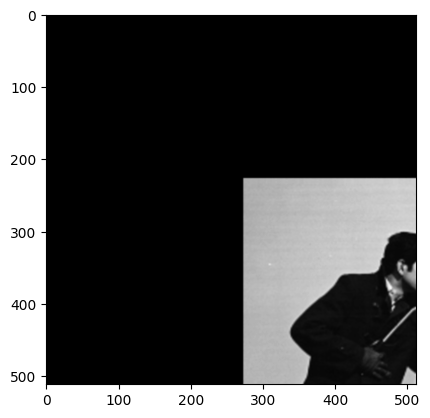

In [36]:
variables_dict = findMoments(img)
img_translated = translate(img, variables_dict)
img_sheared_x = shear(img, variables_dict, 'x')
img_sheared_y = shear(img, variables_dict, 'y')

plt.imshow(img_translated, cmap='gray', interpolation='bicubic')

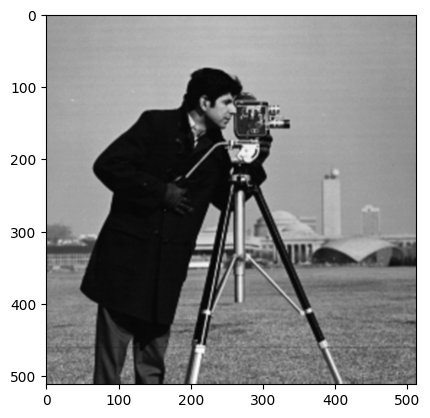

In [37]:
plt.imshow(img, cmap='gray', interpolation='bicubic')

Size of Initial Image: (512, 512)
Size of A1: (512, 512)
Size of B1: (512, 512)
Size of C1: (512, 512)
Size of D1: (512, 512)


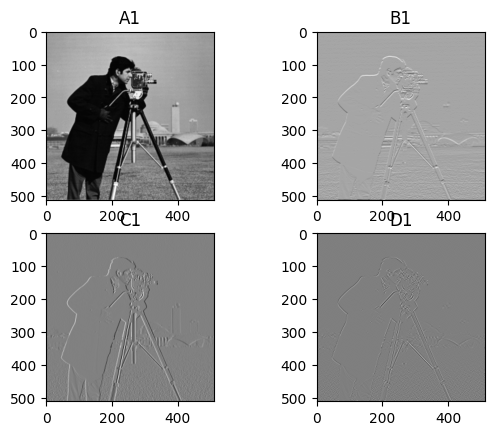

In [38]:

# Perform the Redundant Discrete Wavelet Transform (RDWT) with Haar wavelet
coeffs_org = pywt.swt2(img, 'haar', level=1, axes=(0, 1))

# Extract the coefficients at each level
A1, (B1, C1, D1) = coeffs_org[0]

plt.subplot(2, 2, 1), plt.imshow(A1, cmap='gray'), plt.title('A1')
plt.subplot(2, 2, 2), plt.imshow(B1, cmap='gray'), plt.title('B1')
plt.subplot(2, 2, 3), plt.imshow(C1, cmap='gray'), plt.title('C1')
plt.subplot(2, 2, 4), plt.imshow(D1, cmap='gray'), plt.title('D1')

# Print the size of each transformed image
print('Size of Initial Image:', img.shape)
print('Size of A1:', A1.shape)
print('Size of B1:', B1.shape)
print('Size of C1:', C1.shape)
print('Size of D1:', D1.shape)

# Show the plots
plt.show()

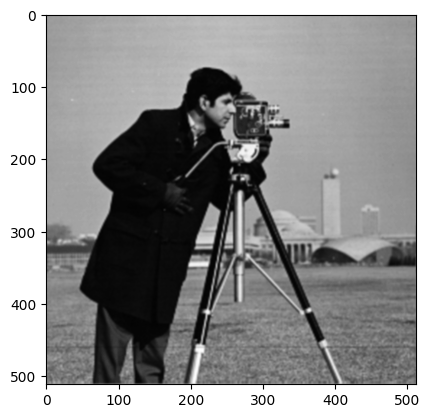

In [39]:
plt.imshow(A1, cmap='gray', interpolation='bicubic')

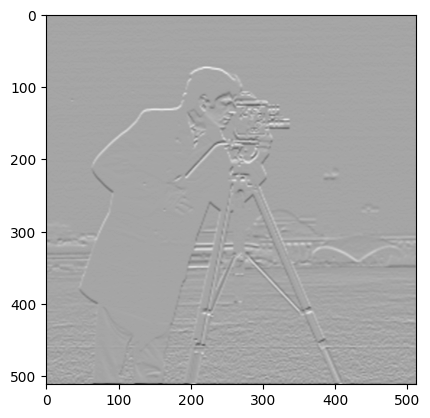

In [40]:
plt.imshow(B1, cmap='gray', interpolation='bicubic')

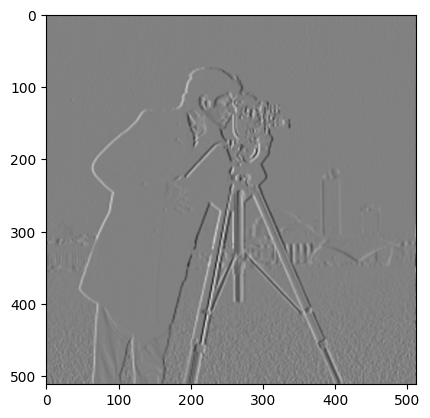

In [41]:
plt.imshow(C1, cmap='gray', interpolation='bicubic')

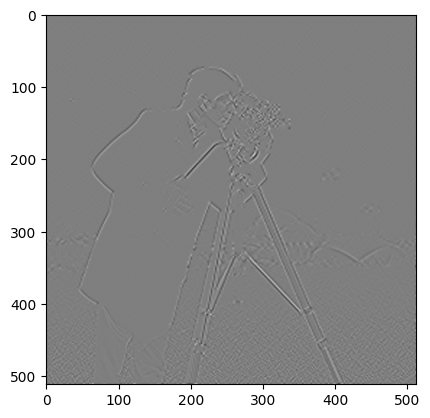

In [42]:
plt.imshow(D1, cmap='gray', interpolation='bicubic')

In [43]:
print(D1[0].size)

512
